In [4]:
pip install FER

Note: you may need to restart the kernel to use updated packages.


########## Source
https://towardsdatascience.com/the-ultimate-guide-to-emotion-recognition-from-facial-expressions-using-python-64e58d4324ff

In [2]:
from tqdm import tqdm

[{'box': [105, 34, 61, 93], 'emotions': {'angry': 1.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.0}}]
angry 1.0


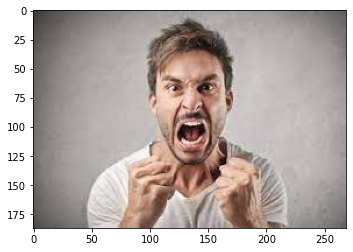

In [1]:
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

test_image_one = plt.imread("angry.jfif")
emo_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)

# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
print(dominant_emotion, emotion_score)

In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:


# Put in the location of the video file that has to be processed
location_videofile = "output.avi"

# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
# pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

INFO:fer:5.00 fps, 469 frames, 93.80 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output\output_output.avi
100%|████████████████████████████████████████████████████████████████████████████| 469/469 [04:01<00:00,  1.94frames/s]
INFO:fer:Completed analysis: saved to output\output_output.avi
INFO:fer:Starting to Zip
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 21%
INFO:fer:Compressing: 31%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 53%
INFO:fer:Compressing: 63%
INFO:fer:Compressing: 74%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 95%
INFO:fer:Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,251.84
1,Disgust,9.04
2,Fear,11.01
3,Happy,1.37
4,Sad,93.12
5,Surprise,0.87
6,Neutral,100.70


In [1]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [2]:
detected_emotions = []
def fer(location):
    # Put in the location of the video file that has to be processed
    location_videofile = location

    # Build the Face detection detector
    face_detector = FER(mtcnn=True)
    # Input the video for processing
    input_video = Video(location_videofile)

    # The Analyze() function will run analysis on every frame of the input video. 
    # It will create a rectangular box around every image and show the emotion values next to that.
    # Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
    processing_data = input_video.analyze(face_detector, display=False)

    # We will now convert the analysed information into a dataframe.
    # This will help us import the data as a .CSV file to perform analysis over it later
    vid_df = input_video.to_pandas(processing_data)
    vid_df = input_video.get_first_face(vid_df)
    vid_df = input_video.get_emotions(vid_df)

    # Plotting the emotions against time in the video
    # pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

    # We will now work on the dataframe to extract which emotion was prominent in the video
    angry = sum(vid_df.angry)
    disgust = sum(vid_df.disgust)
    fear = sum(vid_df.fear)
    happy = sum(vid_df.happy)
    sad = sum(vid_df.sad)
    surprise = sum(vid_df.surprise)
    neutral = sum(vid_df.neutral)

    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

    score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
    score_comparisons['Emotion Value from the Video'] = emotions_values
    for i in range (0, len(score_comparisons)):
        score = score_comparisons['Emotion Value from the Video'][i]
        if score == max(score_comparisons['Emotion Value from the Video']):
            detected_emotions.append(score_comparisons['Human Emotions'][i])

In [3]:
i = 11
while i <= 50:
    if i == 10:
        continue
    loc = "videos\Video " + str(i) + '.mp4'
    fer(loc)
    i = i+1

%save detected_emotions

INFO:fer:20.00 fps, 604 frames, 30.20 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 604/604 [18:22<00:00,  1.83s/frames]
INFO:fer:Completed analysis: saved to output\Video 11_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 16%
INFO:fer:Compressing: 24%
INFO:fer:Compressing: 33%
INFO:fer:Compressing: 41%
INFO:fer:Compressing: 49%
INFO:fer:Compressing: 57%
INFO:fer:Compressing: 66%
INFO:fer:Compressing: 74%
INFO:fer:Compressing: 82%
INFO:fer:Compressing: 91%
INFO:fer:Compressing: 99%
INFO:fer:Zip has finished
INFO:fer:20.00 fps, 335 frames, 16.75 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 335/335 [10:17<00:00,  1.84s/frames]
INFO:fer:Completed analysis: saved to output\Video 12_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 14%
INFO:fer:Compressing: 29%
INFO:fer:Compressing: 4

100%|████████████████████████████████████████████████████████████████████████████| 295/295 [08:44<00:00,  1.78s/frames]
INFO:fer:Completed analysis: saved to output\Video 24_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 16%
INFO:fer:Compressing: 33%
INFO:fer:Compressing: 50%
INFO:fer:Compressing: 67%
INFO:fer:Compressing: 84%
INFO:fer:Zip has finished
INFO:fer:20.00 fps, 253 frames, 12.65 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 253/253 [07:36<00:00,  1.81s/frames]
INFO:fer:Completed analysis: saved to output\Video 25_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 19%
INFO:fer:Compressing: 39%
INFO:fer:Compressing: 59%
INFO:fer:Compressing: 79%
INFO:fer:Compressing: 98%
INFO:fer:Zip has finished
INFO:fer:20.00 fps, 164 frames, 8.20 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 164/164 [02:27<00:

INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 282/282 [04:06<00:00,  1.14frames/s]
INFO:fer:Completed analysis: saved to output\Video 41_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 35%
INFO:fer:Compressing: 53%
INFO:fer:Compressing: 70%
INFO:fer:Compressing: 88%
INFO:fer:Zip has finished
INFO:fer:20.00 fps, 167 frames, 8.35 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 167/167 [02:27<00:00,  1.13frames/s]
INFO:fer:Completed analysis: saved to output\Video 42_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 29%
INFO:fer:Compressing: 59%
INFO:fer:Compressing: 89%
INFO:fer:Zip has finished
INFO:fer:20.00 fps, 313 frames, 15.65 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 313/313 [07:47<00:00,  1.49s/fra

'' was not found in history, as a file, url, nor in the user namespace.


In [5]:
len(detected_emotions)

40

In [8]:
ddf = pd.DataFrame()
ddf['emotion'] = detected_emotions

In [10]:
ddf.to_csv('11-50.csv')

In [1]:
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def classify(i):
    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(i)
    dominant_emotion, emotion_score = emo_detector.top_emotion(i)
    return dominant_emotion

### Testing

In [6]:
def emotion(image):
#     cropped = crop(image)
#     gray = gray(cropped)
    return classify(image)  

In [7]:
test_image_one = plt.imread("angry.jfif")
print(emotion(test_image_one))

angry


In [ ]:
happy
sad
angry
sad
neutral
neutral
sad
sad
angry
fear